In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,LSTM, Dense, Dropout, BatchNormalization


In [14]:
weather_df = pd.read_csv('data\labelled_processed_imd.csv')

In [15]:
weather_df

,YEAR,MN,HR,DT,MSLP,DBT,WBT,DPT,RH,Heatwave_Label,Consecutive_Heatwave,Final_Heatwave_Label
0,2010,1,0,1,1010.1,21.2,17.4,14.8,67,0,0,0
1,2010,1,0,2,1011.2,22.0,19.4,17.8,77,0,0,0
2,2010,1,0,3,1013.2,24.0,21.4,20.0,78,0,0,0
3,2010,1,0,4,1013.7,22.4,18.6,16.1,68,0,0,0
4,2010,1,0,5,1011.0,19.4,18.4,17.8,90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35457,2024,12,60,27,0.0,25.4,27.4,22.1,82,0,0,0
35458,2024,12,60,28,0.0,25.4,27.4,22.1,82,0,0,0
35459,2024,12,60,29,0.0,26.0,27.4,20.2,70,0,0,0
35460,2024,12,60,30,0.0,26.2,27.4,22.0,78,0,0,0


In [16]:
# Define feature columns and target variable
feature_cols = ["MSLP", "DBT", "WBT", "DPT", "RH"]
target_col = "Final_Heatwave_Label"

X = weather_df[feature_cols].values  # Convert to numpy array
y = weather_df[target_col].values  # Labels

In [17]:
time_steps = 5  # Choose how many past time steps to consider
X_reshaped = np.array([X[i-time_steps:i] for i in range(time_steps, len(X))])
y_reshaped = y[time_steps:] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)


In [ ]:
# Define CNN-LSTM model
model = Sequential([
    # 1D CNN Layers
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    # LSTM Layer
    LSTM(100, return_sequences=False, activation='relu'),
    Dropout(0.3),
    
    # Fully Connected Layers
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (heatwave vs. no heatwave)
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()


c:\Users\LaukikS\anaconda3\envs\dm-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 3, 64)          │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,381 (282.74 KB)

 Trainable params: 72,253 (282.24 KB)

 Non-trainable params: 128 (512.00 B)

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8918 - loss: 0.2720 - val_accuracy: 0.9162 - val_loss: 0.2119
Epoch 2/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9143 - loss: 0.2014 - val_accuracy: 0.9178 - val_loss: 0.1986
Epoch 3/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9156 - loss: 0.1928 - val_accuracy: 0.8961 - val_loss: 0.3209
Epoch 4/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9212 - loss: 0.1912 - val_accuracy: 0.3670 - val_loss: 0.8819
Epoch 5/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9187 - loss: 0.1897 - val_accuracy: 0.8945 - val_loss: 0.3034
Epoch 6/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9216 - loss: 0.1878 - val_accuracy: 0.9174 - val_loss: 0.1974
Epoch 7/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9161 - loss: 0.1968 - val_accuracy: 0.9050 - val_loss: 0.2890
Epoch 8/30
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9205 - loss: 0.1890 - val_accuracy: 0.

In [22]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict Heatwaves
y_pred = (model.predict(X_test) > 0.5).astype(int)


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.2035
Test Accuracy: 0.9206
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


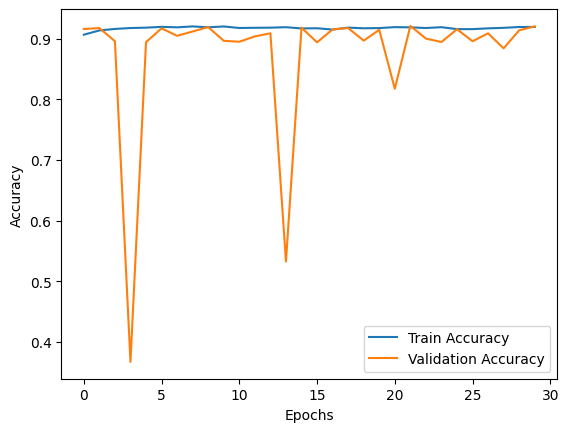

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
